In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1: Simple Linear Equation Example

Consider a simple market equilibrium model where the demand and supply function are respectively given by

$$\text{D}\colon\quad p=a-bq$$

$$\text{S}\colon\quad p=c+dq$$

where $p$ is the price, $q$ is the quantity and $a,b,c,d$ are parameters.


In [2]:
def D(q, a, b):
    """
    Linear quantity demand function as a function of quantity.

    Arguments:
    q - quanity input
    a - intercept
    b - slope

    Returns:
    p - price output
    """
    p = a-b*q

    return p

def invD(p, a, b):
    """
    Inverse linear quantity demand function as a function of price.

    Arguments:
    p - price input
    a - intercept
    b - slope

    Returns:
    q - quantity output
    """

    q = (a-p)/b

    return q

def S(q, c, d):
    """
    Linear quantity supply function as a function of quantity.

    Arguments:
    q - quantity input
    c - intercept
    d - slope

    Returns:
    p - price output
    """
    p = c+d*q

    return p

def invS(p, c, d):
    """
    Inverse linear quantity supply function as a function of price.

    Arguments:
    p - price input
    c - intercept
    d - slope

    Returns:
    q - quantity output
    """
    q = (p-c)/d

    return q

### 1. Show that market equilibirum is characterized by the relationship

$$bq+dq-(a-c)=0$$

First off, define the excess supply function:

$$\text{Z}(q)\equiv\text{S}(q)-\text{D}(q)=c+dq-a-bq$$

The market equilibrium is characterized by zero excess quantity:

$$\text{Z}(q)=0\iff bq+dq-(a-c)=0$$

### 2. Analytically compute the equilibrium allocation and corresponding price, $(q^*,p^*)$.

We may derive the optimal market quantity using $\text{Z}(q)=0$:

$$\text{Z}(q)=0\iff q^*=\frac{a-c}{b+d}$$

Hence, the optimal price $p^*$ is then given by:

$$p^*\colon\quad D(p^*)=S(p^*)\iff a-bq^*=c+dq^*$$

The optimum allocation of the economy is the pair $(q^*,p^*)$.

### 3. Next, transform the system of equations $\text{D}$ and $\text{S}$ into a standard linear equation system of the form $\mathbf A\mathbf x=\mathbf y$ for coefficient matrix $\mathbf A$, variable vector $\mathbf x=[p,q]^\intercal$ and data vector $\mathbf y$. Analytically solve this system of equations by an LU decomposition applying the steps from the slides of the lecture.

Define coefficient matrix $\mathbf A$ as

$$\mathbf A=\begin{bmatrix}a&-b\\c&d\end{bmatrix}$$

Define the variable vector $\mathbf x$ and the data vector $y$ as

$$\mathbf x=[1,q]^\intercal$$

$$y=[p, p]^\intercal$$

Hence, the economy is defined as

$$\mathbf A\mathbf x=y\iff \begin{bmatrix}a&-b\\c&d\end{bmatrix}\begin{bmatrix}1\\q\end{bmatrix}=\begin{bmatrix}p\\p\end{bmatrix}$$

Let $\mathbf I$ be identity matrix of shape $(2,2)$. Using Gaussian elimination algorithm we nullify the entries below the main diagonal of matrix $\mathbf A$ and let $\mathbf I_{22}=-\mathbf A_{22}$$:

$$\mathbf A=\begin{bmatrix}a&-b\\c&d\end{bmatrix}\stackrel{\mathbf A_{2}-\mathbf A_{1}\frac{\mathbf A_{21}}{\mathbf A_{11}}}{\to}\begin{bmatrix}a&-b\\0&\tilde{d}\end{bmatrix}=\mathbf A^1$$

$$\mathbf I=\begin{bmatrix}1&0\\0&1\end{bmatrix}\stackrel{\mathbf I_{22}=\frac{\mathbf A_{21}}{\mathbf A_{11}}}{\to}\begin{bmatrix}1&0\\\frac{c}{a}&1\end{bmatrix}=\mathbf I^1$$

where $\tilde{d}=d+b\frac{c}{a}$. Hence, $\mathbf A^1\equiv\mathbf U$ is the upper triangular matrix and $\mathbf I^1\equiv\mathbf L$ is the lower triangular matrix satisfying

$$\mathbf L\mathbf U=\mathbf A$$

Using forward substitution it may be shown that $\mathbf h$ in the equation

$$\mathbf L\mathbf h=\mathbf y$$

equals $\mathbf h=\biggr[p, (1-\frac{c}{a})p\biggr]^\intercal$

Using backward substitution it may be shown that $\mathbf x$ in the equation

$$\mathbf U\mathbf x=\mathbf h$$

equals $\mathbf x=\biggr[1,\frac{a-c}{d+b}\biggr]^\intercal$. While solving the equation above we find that $p^*=\frac{ad+bc}{d+b}$.



### 4. Now parametrize the model with $a=3,b=0.5,c=d=1$. Compute $(q^*,p^*)$.

We now have the closed form of the optimal allocation $(q^*,p^*)$:

$$(q^*,p^*)=\biggr(\frac{a-c}{d+b},\frac{ad+bc}{d+b}\biggr)=\biggr(\frac{4}{3},\frac{7}{3}\biggr)$$

### 5. Implement a Gauss-Seidel fixed-point iteration for solving the system of equations. Initialize the iteration with $(q,p)=(0.1,0.1). For which order of the equation system does the system converge? Illustrate convergence and non-convergence graphically.

In [3]:
def gaussSeidel(p0, q0, a, b, c, d, order, gammas = [1], numIter = 1000, tol = 1/10e5):
    """
    Gauss-Seidel fixed-point iteration algorithm for solving the system of equations.

    Arguments:
    p0 - initial price input
    q0 - initial quantity input
    a - demand function intercept
    b - demand function slope
    c - supply function intercept
    d - supply function slope
    order - order of solving the system. Takes on only 'direct' and 'indirect' values
    gamma - vector of dampening factors. Default is [1] (no dampening)
    numIter - number of iterations. Default is 1000
    tol - convergence tolerance. Default is 1/10e5

    Returns:
    c, z where
        c - convergence binary True/False
        z - quantity-price output vector of form (p*, q*)
    """
    history = pd.DataFrame(np.array([[0, p0, q0]]), columns=['iteration', 'price', 'quantity'])
    historyGamma = pd.DataFrame(np.array([[0, gammas[0], p0, q0]]), columns=['iteration', 'lambda', 'price', 'quantity'])

    for gamma in gammas:
        c = False
        p1 = p0
        q1 = q0
        Iter = 0

        history = history.append({
                'iteration': Iter,
                'price': p1,
                'quantity': q1},
                ignore_index=True)
        historyGamma = historyGamma.append({
                'iteration': Iter,
                'lambda': gamma,
                'price': p1,
                'quantity': q1},
                ignore_index=True)

        while Iter < numIter:
            Iter += 1

            if order == 'direct':
                p2 = D(q1, a, b)
                q2 = invS(p1, c, d)
            elif order == 'indirect':
                q2 = invD(p1, a, b)
                p2 = S(q1, c, d)
            else:
                return "parameter 'order' must be either 'direct' or 'indirect'"

            history = history.append({
                'iteration': Iter,
                'price': p2,
                'quantity': q2},
                ignore_index=True)
            p2 = gamma * p2 + (1 - gamma) * p1
            q2 = gamma * q2 + (1 - gamma) * q1
            historyGamma = historyGamma.append({
                'iteration': Iter,
                'lambda': gamma,
                'price': p2,
                'quantity': q2},
                ignore_index=True)

            currentState = np.array([p2, q2])
            previousState = np.array([p1, q1])
            dist = np.linalg.norm(currentState - previousState)
            stoppingRule = np.linalg.norm(currentState)

            if dist < tol * (1 + stoppingRule):
                c = True
                z = currentState

                break

            p1 = p2
            q1 = q2
            
        
    z = currentState

    return c, Iter, z, history, historyGamma

cD, IterD, zD, historyD, historyGammaD = gaussSeidel(0.1, 0.1, 3, 1/2, 1, 1, 'direct')
print('ORDER: DIRECT | Converged {} at iteration {}. Set (p*, q*) is {}'.format(cD, IterD, zD))

cI, IterI, zI, historyI, historyGammaI = gaussSeidel(0.1, 0.1, 3, 1/2, 1, 1, 'indirect')
print('ORDER: INDIRECT | Converged {} at iteration {}. Set (p*, q*) is {}'.format(cI, IterI, zI))

ORDER: DIRECT | Converged True at iteration 41. Set (p*, q*) is [2.00000091 1.99999819]
ORDER: INDIRECT | Converged False at iteration 1000. Set (p*, q*) is [-6.21944216e+150 -6.21944216e+150]


Text(367.48863636363626, 0.5, 'quantity')

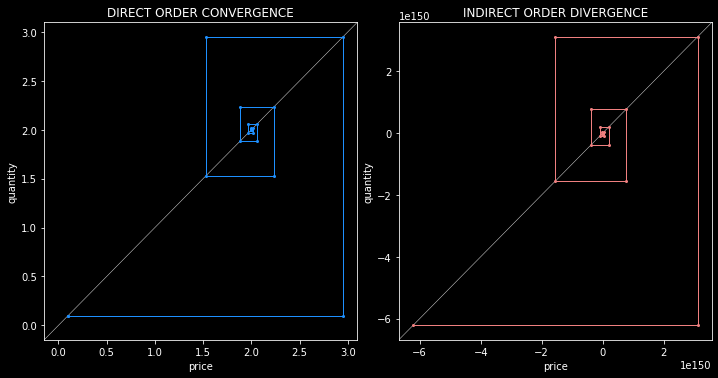

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout()
ax1.axline([0, 0], [1, 1], color = 'gainsboro', linewidth = 0.5)
ax1.plot(historyD['price'], historyD['quantity'], color = 'dodgerblue', marker = 'o', markersize = 2, linewidth = 1)
ax1.title.set_text('DIRECT ORDER CONVERGENCE')
ax1.set_xlabel('price')
ax1.set_ylabel('quantity')

ax2.axline([0, 0], [1, 1], color='gainsboro', linewidth = 0.5)
ax2.plot(historyI['price'], historyI['quantity'], color='lightcoral', marker='o', markersize = 2, linewidth = 1)
ax2.title.set_text('INDIRECT ORDER DIVERGENCE')
ax2.set_xlabel('price')
ax2.set_ylabel('quantity')

### 6. Revisit the non-convergent case. Apply a dampening factor (or overrelaxation paramater) $\lambda$. Consider a grid for $\lambda\in[0.1,0.2,\dots,0.9]$.

In [5]:
gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
cI, IterI, zI, historyI, historyGammaI = gaussSeidel(0.1, 0.1, 3, 1/2, 1, 1, 'indirect', gammas=gammas)

for gamma in pd.unique(historyGammaI['lambda']):
    print('ORDER: INDIRECT | LAMBDA: {} | Iteration {} | Set (p*, q*) is ({}, {})'.format(
        gamma,
        historyGammaI[historyGammaI['lambda'] == gamma].iloc[-1]['iteration'],
        historyGammaI[historyGammaI['lambda'] == gamma].iloc[-1]['price'],
        historyGammaI[historyGammaI['lambda'] == gamma].iloc[-1]['quantity']))



ORDER: INDIRECT | LAMBDA: 0.1 | Iteration 128.0 | Set (p*, q*) is (1.999986367997711, 2.000010161752128)
ORDER: INDIRECT | LAMBDA: 0.2 | Iteration 78.0 | Set (p*, q*) is (1.9999953932481276, 2.0000061804550766)
ORDER: INDIRECT | LAMBDA: 0.3 | Iteration 66.0 | Set (p*, q*) is (2.000002985098849, 1.9999957435550177)
ORDER: INDIRECT | LAMBDA: 0.4 | Iteration 69.0 | Set (p*, q*) is (1.9999988922040934, 2.0000052524837786)
ORDER: INDIRECT | LAMBDA: 0.5 | Iteration 94.0 | Set (p*, q*) is (1.9999989256158832, 2.000004148160561)
ORDER: INDIRECT | LAMBDA: 0.6 | Iteration 211.0 | Set (p*, q*) is (1.9999979551515525, 1.9999964569951039)
ORDER: INDIRECT | LAMBDA: 0.7 | Iteration 1000.0 | Set (p*, q*) is (-1032961060644454.8, 697578318253874.6)
ORDER: INDIRECT | LAMBDA: 0.8 | Iteration 1000.0 | Set (p*, q*) is (-4.2407416169294714e+60, 2.1529897804255705e+60)
ORDER: INDIRECT | LAMBDA: 0.9 | Iteration 1000.0 | Set (p*, q*) is (2.558969535976884e+106, 1.8933472524380976e+106)


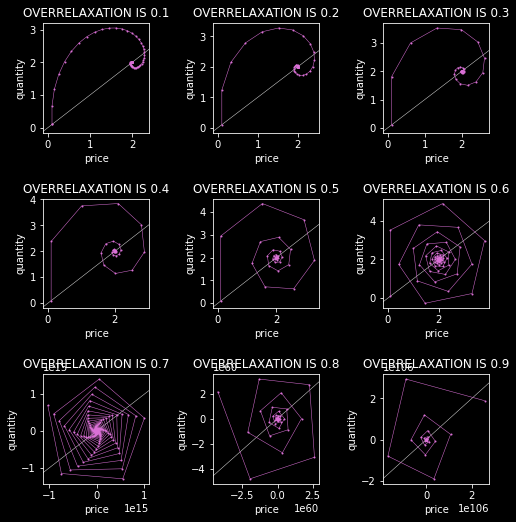

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.6, hspace = 0.6)
axes = axes.ravel()

for i in range(pd.unique(historyGammaI['lambda']).__len__()):
    price = historyGammaI[historyGammaI['lambda'] == gammas[i]]['price']
    quantity = historyGammaI[historyGammaI['lambda'] == gammas[i]]['quantity']

    axes[i].axline([0, 0], [1, 1], color='gainsboro', linewidth = 0.5)
    axes[i].plot(price, quantity, color='orchid', marker='o', markersize = 1, linewidth = 0.5)
    axes[i].title.set_text('OVERRELAXATION IS ' + str(gammas[i]))
    axes[i].set_xlabel('price')
    axes[i].set_ylabel('quantity')